# Paper Review

Shauna Heron (Laurentian University)

# **Introduction and Motivation**

This review analyzes the study by Garriga et al. (2023), published in *Cell Medical*, titled *“Combining Clinical Notes with Structured Electronic Health Records Enhances the Prediction of Mental Health Crises.”*

The research investigates the utility of combining unstructured clinical notes with structured data from electronic dirhealth records (EHR) to improve the prediction of mental health crises. The relevance of @garriga2023 study is underscored by an alarming rise in mental health-related hospitalizations coinciding with significant resource and workforce challenges. Even in Ontario, recent data highlights that hospitalizations for mental health conditions, particularly among youth in Ontario, have surged since the COVID-19 pandemic. Moreoever, those requiring hospitalization (e.g., emotional breakdowns, substance overdoses and suicide attempts) have increased by 90% (CIHI 2022). Many of these crises might have been prevented with early intervention; however, a lack of reliable, automated predictive tools has made it difficult for healthcare systems to anticipate and address these crises before they peak.

As @garriga2023 point out in their paper, leveraging EHRs to bolster clinical decision-making is not new. Clinicians and researchers have long utilized structured data like diagnosis codes, lab results, and medication records to inform predictive models. However, limits on computational power meant that unstructured data like clinical notes and other free-form text, were most often left out of feature sets.

Considering the rich contextual information that clinical notes contain, as well as advances in free-form text processing, the primary aim of this study was to determine if including clinical notes alongside structured EHR data would enhance predictive performance for mental health crisis prediction compared to using structured data alone.

# **Problem Statement**

The study addressed the underutilization of unstructured data in EHRs, which could provide rich, contextual information that may be important data in improving prediction of mental health crises. For instance, a patient’s history of recurring symptoms linked with a traumatic incident may be documented qualitatively in the clinical notes but not the structured data, missing information that might provide a more comprehensive understanding of potential future risks. The paper aimed to bridge this gap by incorporating these unstructured elements into predictive modeling. – something about patterns –

# **Solution**

With these points in mind, the authors proposed a hybrid approach combining structured and unstructured data. Specifically, they utilized a deep neural network (DNN) to integrate both data types, hypothesizing that models including unstructured data (such as clinical notes) would predict crisis events more accurately than just structured data alone.

The models included a deep neural network trained on structured data (referred to as Struct DNN), a model trained exclusively on unstructured data (Text DNN), and a combined model that integrated both structured and unstructured data (Hybrid DNN) if. Based on those tests, the final model selection used an ensemble of predictions from the Hybrid DNN when unstructured data was available and predictions from the Struct DNN model otherwise (referred to as Ensemble DNN).

**Model Architecture and Data Flow Diagram:**

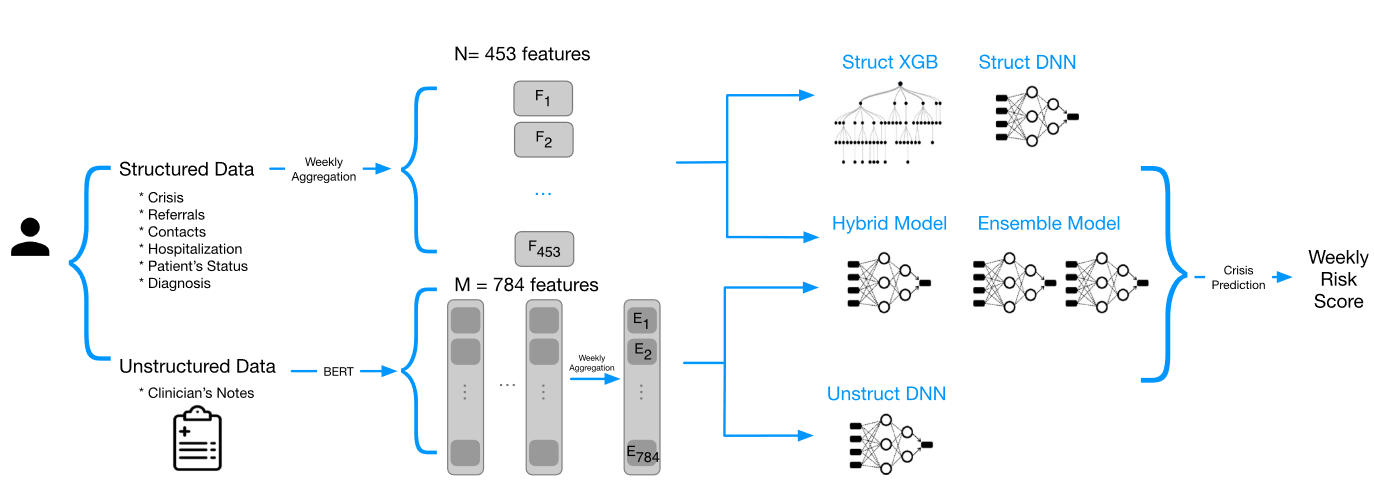{ alt="Figure: Model Architecture"} *Figure 1. Overview of the Hybrid DNN model and data input structure, showing how structured and unstructured data are processed.*

To address the issue of class imbalance (since relapses were rare with only 1.3% prevalence), models were tuned to maximize the area under the precision-recall curve (AUPRC)–which as we learned in class is particularly useful metric when evaluating results produced by imbalanced classes. As highlighted in our lessons, precision-recall metrics over relying on accuracy alone provides a better measure of a model’s predictive quality when data is unbalanced and in settings where sensitivity and an ability to minimize false positives are critical to balance in predicting health crises.

To evaluate model performance, two baselines were used for comparison: a 5-factor logistic regression model informed by significant variables suggested in prior literature (LogReg5) and a heuristic model ranking patients by the total number of crises experienced in the past year.

# **Experimental Results**

The experiments revealed that the best model trained on structured data was an XGBoost classifier, a tree-based model implementing gradient boosting. However, for models that included unstructured data (clinical notes), the Hybrid DNN provided the best performance. This finding suggests that their hypothesis was correct: incorporating clinical notes improved model ability to identifying potential mental health crises earlier compared to models trained on only structured data. The Hybrid DNN outperforming both the logistic regression baseline and the heuristic model with the highest AUPRC.

**Performance Comparison Across Models:**

To visualize the comparative performance, the following charts display the ROCAUC and AUPRC for different models:

**Precision-Recall Curve for Different Models:**

The precision-recall curve in figure \_\_\_ underscores why precision and recall are better choices for unbalanced data and in scenarios like mental health crisis prediction, where potential crises are flagged but the model is still precise enough to minimize false positives. This aligns with our class discussions on balancing the risks of false positives versus false negatives, particularly in high-stakes healthcare settings where there is a cost to both.

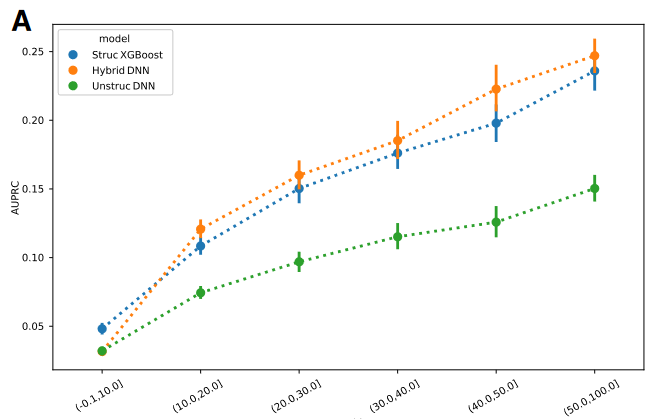 *Figure 3. Precision-recall curves for the Hybrid DNN, Struct DNN, and Text DNN, across 10-week intervals illustrating an increase in performance of all models over time as the amount of information increases across weeks.*

According to the author’s the increase over time is most likely only in part due to the increase in information in the clinical record over time but due mostly to the clinical fact that the prevalance of crisis-relapse tends to increase over time regardless.

The AUROC curve on the other hand shows a different pattern. The performance of the Structured and Unstructured-only models decreases over time until about 45 weeks when the structured models performance increases. Interestingly, the performance of the unstructured-only model continues to decrease, which the authors suggest highlights the complexity of modelling mental health crises where the quantity of data in a given client file will tend to increase over time, the overall number of patients decreases which impacts the neural network. Considering neural networks based on text input tends to require more examples or training instances to perform adequately. Note too how the structured only xgboost is best at predicting crisis in the earliest stages with fewer than 10% of notes, but with 20% of weeks with available notes, the hybrid model’s performance jumps to match the unstructured offering a slight improvement on performance when compared the XGBoost alone which indicates that the addition of unstructured data helped the model make more accurate predictions across a range of thresholds, improving its overall discriminatory power.

**AUROC Across 52 weeks:**

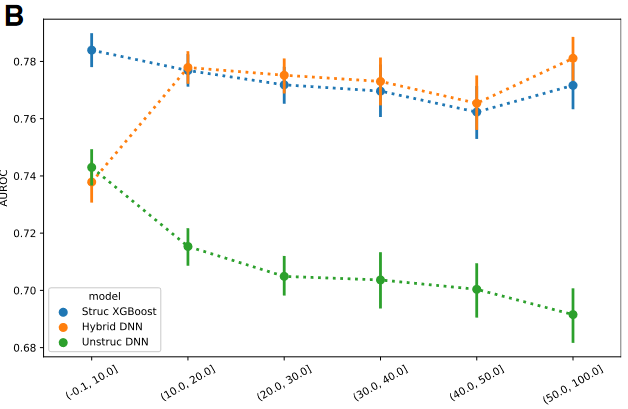 *Figure 4. Performance of the Hybrid model compared to the unstructured and structured only models in predicting crisis episodes at 10 week intervals. Points and lines indicate mean and ± standard deviation values computed in the 52 weeks of the test set.*

# **Conclusion**

The study effectively demonstrated that incorporating unstructured data, such as clinical notes, alongside structured EHR data improved the ability to predict mental health crises. Their findings underscore the potential for including qualitative clinical information in predictive modeling and highlights a novel ensemble methodology that can be used to build a combined model that can effectively extract value from both data types. depening on what type is available.

# **Critical Analysis**

The paper offered a compelling case for the inclusion of unstructured data in predictive modeling, but there are several areas for improvement. Firstly, while the authors highlighted the potential benefits of unstructured data, the interpretability of their hybrid model remained limited. In class, we learned about techniques like Local Interpretable Model-agnostic Explanations (LIME) and SHapley Additive exPlanations (SHAP), which could be used to make the DNN’s predictions more interpretable. Incorporating such methods would make the model’s predictions more actionable for healthcare practitioners, who need clear explanations to make informed decisions.

Future research could explore the generalizability of these findings to other domains within healthcare. In particular, in my own research I am wondering how this method could be used to predict case complexity to caseload management. and refine @garriga2023 ’s approach to make the integration of unstructured data more interpretable. Another potential direction was improving methods for natural language processing (NLP) to better extract meaningful insights from clinical notes, which could further enhance predictive performance.

I especially liked their inclusion of SHAP values and analyses of variables that contributed most to model predictions–TALK MORE ABOUT THIS.

Secondly, the study primarily focused on a single health system, which might limit the generalizability of the results. Future studies should consider multi-site evaluations to determine if the predictive power of these models held in different settings with varied data quality and clinical practices.

Lastly, while the results were promising, they relied heavily on high-quality, well-documented clinical notes. In practice, the quality of clinical notes could vary significantly, and the models’ reliance on unstructured data could lead to inconsistencies in predictions if the notes were incomplete or ambiguous.